## Problem Statement:
 
#### A loan application consists of multiple forms in no particular order. A US Bank wants to automate the process of identifying specific documents from different loan packages and extract relevant data from a particular form.


### Problem is based on Unstructured data, its NLP model,multi class classfication problem, in the below code it embarks with data preprocessing like removing unnecessary characters, text in to lower case, removing Stopwords and for text normalization use Stemming and lematizing. after Successful processing of text. converted data in to structured form by implementing TFIDF Vectorizer. now the data is converted to structured. Building Machine learning models using Naive bayes, Logistic Regression and SVM. apart from three model SVM performed well. 

In [ ]:
#Loading Required Packages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
stemming = PorterStemmer()
lemmatizer = WordNetLemmatizer() 

In [ ]:
#Reading data in to Dataframe

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Train_data.csv to Train_data.csv


In [4]:
df=pd.read_csv('Train_data.csv')

In [5]:
df.head()

,Label,Text
0,CLOS_DISC,Closing DisclosureThis form is a statement of ...
1,CLOS_DISC,Closing Cost DetailsBorrower-PaidSeller-PaldLo...
2,CLOS_DISC,Calculating Cash to CloseUse this table to see...
3,CLOS_DISC,Additiona Information About This LoanLoan Disc...
4,CLOS_DISC,Loan CalculationsOther DisclosuresTotal of Pay...


In [6]:
#Analysis of Data

In [7]:
df.shape

(16130, 2)

In [8]:
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [9]:
df['Label'].value_counts()

None                                                       8065
MORTGAGE                                                    891
CREDIT_REPORT                                               754
FORM1003                                                    716
CLOS_DISC                                                   676
APPRAISAL                                                   571
PURCHASE_CONTRACT                                           449
AUS-DU                                                      393
TITLE                                                       383
LOAN_EST                                                    319
NOTE                                                        239
CPL                                                         225
HOMEOWNERSHIP_COUNSELING_ORG_LIST                           222
FORM4506-T                                                  218
WARRANTY_DEED                                               131
VERBAL_VOE                              

In [10]:
df['Label']=df['Label'].str.lower()

In [11]:
df.head()

,Label,Text
0,clos_disc,Closing DisclosureThis form is a statement of ...
1,clos_disc,Closing Cost DetailsBorrower-PaidSeller-PaldLo...
2,clos_disc,Calculating Cash to CloseUse this table to see...
3,clos_disc,Additiona Information About This LoanLoan Disc...
4,clos_disc,Loan CalculationsOther DisclosuresTotal of Pay...


In [12]:
df['Label'].value_counts()

none                                                       8065
mortgage                                                    891
credit_report                                               754
form1003                                                    716
clos_disc                                                   676
appraisal                                                   571
purchase_contract                                           449
aus-du                                                      393
title                                                       383
loan_est                                                    319
note                                                        240
cpl                                                         225
homeownership_counseling_org_list                           222
form4506-t                                                  218
warranty_deed                                               131
verbal_voe                              

In [13]:
df['Label']=df['Label'].replace('-','none')

In [14]:
df['Label'].value_counts()

none                                                       8069
mortgage                                                    891
credit_report                                               754
form1003                                                    716
clos_disc                                                   676
appraisal                                                   571
purchase_contract                                           449
aus-du                                                      393
title                                                       383
loan_est                                                    319
note                                                        240
cpl                                                         225
homeownership_counseling_org_list                           222
form4506-t                                                  218
warranty_deed                                               131
verbal_voe                              

### Adding single digit occurrence of Labels into none.


In [15]:
labels=['purchase_contract_extension_addendum','chain of title','informed_choice_disclosure_notice/',
       'loan approval','purchase contract','credit report']

In [16]:
for i in range(len(df['Label'])):
    if df['Label'][i] in labels:
        print(df['Label'][i])

chain of title
loan approval
purchase_contract_extension_addendum
purchase_contract_extension_addendum
chain of title
purchase_contract_extension_addendum
purchase contract
purchase_contract_extension_addendum
purchase_contract_extension_addendum
credit report
informed_choice_disclosure_notice/


In [17]:
for i in range(len(df['Label'])):
    if df['Label'][i] in labels:
        df["Label"][i]='none'

In [18]:
df['Label'].value_counts()

none                                                       8080
mortgage                                                    891
credit_report                                               754
form1003                                                    716
clos_disc                                                   676
appraisal                                                   571
purchase_contract                                           449
aus-du                                                      393
title                                                       383
loan_est                                                    319
note                                                        240
cpl                                                         225
homeownership_counseling_org_list                           222
form4506-t                                                  218
warranty_deed                                               131
verbal_voe                              

In [19]:
len(df['Label'].value_counts())

48

### Renaming none label with others for better understanding, and remaining labels is not changing.
### After some modification now labels were 48, based on bussiness senario we can make some more modifications in labels

In [20]:
df['Label']=df['Label'].replace('none','others')

In [21]:
# after making changes on lables size of data is as before.

In [22]:
df.shape

(16130, 2)

In [23]:
df.sample(5)

,Label,Text
10165,others,"April 28, 2017United Wholesale MortgageLoan #1..."
4880,clos_disc,Payoffs and PaymentsUse this table to see a su...
9804,others,1/17/2018GEMSTARR MORTGAGE - CECIL J LESLIEURL...
2443,clos_disc,THIS IS A TRUE CERTIFIED COPY OFTHE ORIGINAL D...
1782,title,CHICAGO TITLEINSURANCE COMPANYSchedule B-|AMER...


### Text PreProcessing

In [24]:
df['Text'] = df['Text'].str.replace("\r", " ")
df['Text'] = df['Text'].str.replace("\n", " ")
df['Text'] = df['Text'].str.replace("    ", " ")
df['Text'] = df['Text'].str.replace('"', '')
df['Text'] = df['Text'].str.replace("'s", "")

punctuation_signs = list("?:!.,;")
for punct_sign in punctuation_signs:
    df['Text'] = df['Text'].str.replace(punct_sign, '')

In [25]:
text=df['Text']

In [26]:
len(text)

16130

In [27]:
df['Text'][0]

'Closing DisclosureThis form is a statement of final loan terms and closing costs Compare thisdocument with your Loan EstimateClosing InformationTransaction InformationLoan InformationDate Issued02/09/2018BorrowerNEELAKANTHA M HARRINGTON andLoan Term30 yearsClosing Date02/09/2018ELIZABETH BERNADINE HARRINGTONPurposePurchaseDisbursement Date02/09/201817300 SW 88TH CTProductFixed RateSettlement AgentENTRUST SOLUTIONS LLCPALMETTO BAY FL 33157SellerIFLIPPER HOMES LLCFile #1359-16FL-0127Loan TypeXX ConventionalFHA8874 SW 229 SSTProperty17201 SW 90TH AVEMIAMI FL 33190VAPALMETTO BAY FL 33157LenderUNITED WHOLESALE MORTGAGELoan ID #1217172251Sale Price$46999900MIC #Loan TermsCan this amount increase after closingLoan Amount$446499NOInterest Rate5375%NOCEFTIFY THAT THISIS ATRUE AND CORREC COPYOF THE ORIGINALMonthly Principal & Interest$250027NOEASee Projected Payments below for yourEstimated Total Monthly PaymentDoes the loan have these featuresPrepayment PenaltyNOBalloon PaymentNOProjected Paym

In [36]:
corpus=[]

In [37]:
#Cleaning of Text removing any extra characters other than strings, text in to small case, 
#stemming, lematizing for making text in to normalized form.

In [ ]:
for i in range(len(text)):
    message = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    message = message.lower()
    message = message.split()
    
    message = [stemming.stem(word) for word in message if not word in stopwords.words('english')]
    message=  [lemmatizer.lemmatize(word) for word in message if not word in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)
    print(i)

In [40]:
# Creating the Bag of Words model

In [41]:
tfidf = TfidfVectorizer(max_features=2500,stop_words='english')

In [42]:
X = tfidf.fit_transform(corpus).toarray() 



In [44]:
X.shape

(16130, 2500)

In [61]:
l=list(df['Label'].unique())

In [62]:
l

['clos_disc',
 'note',
 'mortgage',
 'warranty_deed',
 'wiring_inst',
 'chain_title',
 'title',
 'notice of ad valorem tax',
 'cpl',
 'survey',
 'policy endorsement',
 'escrow',
 'qm_breakdown',
 'homeownership_counseling_org_list',
 'ack_homeownership_counseling_org_list',
 'form1003',
 'approval',
 'lock_conformation',
 'aus-du',
 'credit_report',
 'verbal_voe',
 'appraisal',
 'loan_est',
 'steering',
 'appraisal_report_invoice',
 'survey invoice',
 'third party processing invoice',
 'hoi invoice',
 'credit_inquiry',
 'patriot',
 'form4506-t',
 'bussiness_arrangement_disc_statement',
 'flood_insurance',
 'flood',
 'consent_and_intent_to_proceed',
 'appraisal_delivery_waiver/consent_and_intent_to_proceed',
 'credit inquiry',
 'equal_credit_oppurtunity_act',
 'others',
 'purchase_contract',
 'purchase_contract_addendum',
 'coc',
 'hoi',
 'appraisal_delivery_waiver',
 'notice_to_homeowner',
 'important_notice_to_homebuyers',
 'informed_choice_disclosure_notice',
 'fha_identity_of_intere

In [63]:
labelencoder = LabelEncoder()

In [64]:
df['label_encoder']=labelencoder.fit_transform(df['Label'])

In [65]:
df

,Label,Text,label_encoder
0,clos_disc,Closing DisclosureThis form is a statement of ...,9
1,clos_disc,Closing Cost DetailsBorrower-PaidSeller-PaldLo...,9
2,clos_disc,Calculating Cash to CloseUse this table to see...,9
3,clos_disc,Additiona Information About This LoanLoan Disc...,9
4,clos_disc,Loan CalculationsOther DisclosuresTotal of Pay...,9
...,...,...,...
16125,others,(0FILE #000135-000135PESXX9 091959758Earnings ...,34
16126,others,FraudGuardHamel Robert1028904BORROWER 1 (Rober...,34
16127,others,SHnVNDISOSNO BAEGTNyooahsis $aN33e S86VH SWONS...,34
16128,others,1Inbox (32) daniel@cariWells FargoxQG a Secure...,34


In [66]:
y=df['label_encoder']

In [ ]:
# Train Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [68]:
# Training model using Naive bayes classifier, Logistic Regression, Support Vector Classifier

In [90]:
naive_model = MultinomialNB()

naive_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
y_pred=naive_model.predict(X_test)

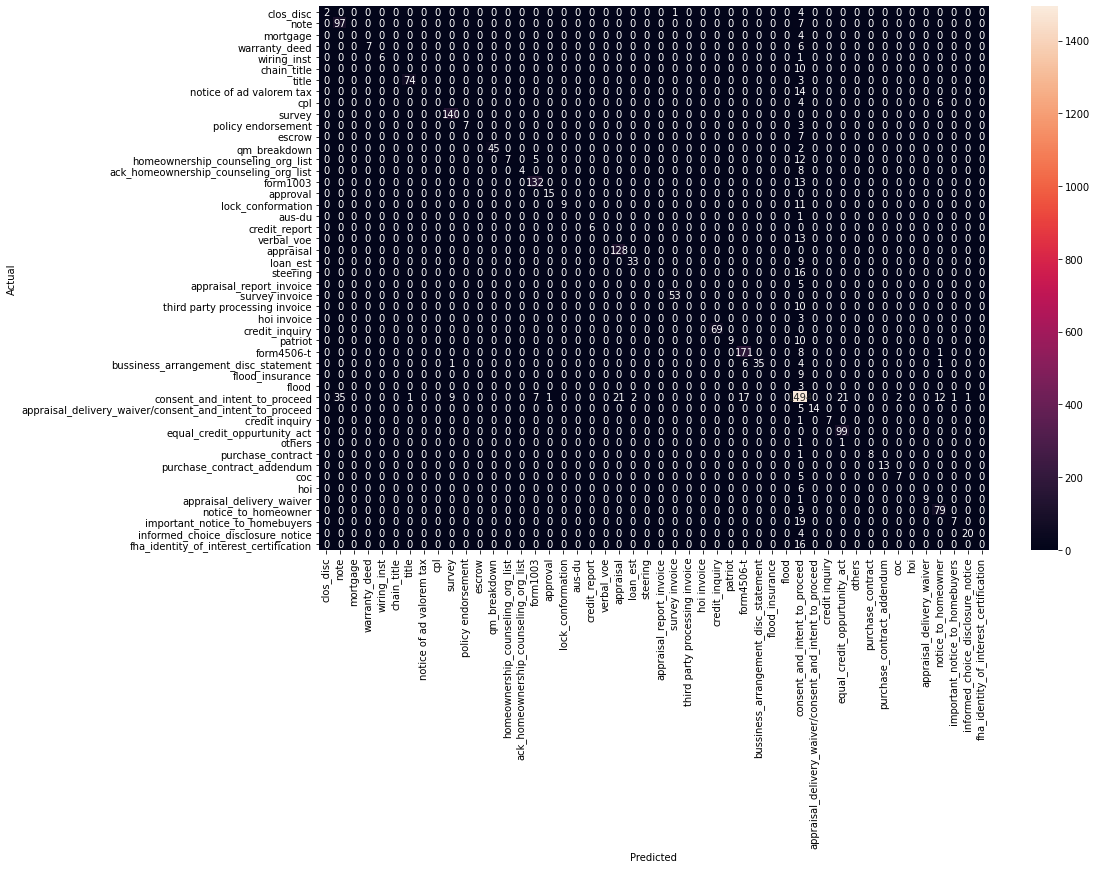

In [92]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=l, yticklabels=l)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [93]:
print ('Accuracy:', accuracy_score(y_test, y_pred))

print ('F1 score:', f1_score(y_test, y_pred,
                            average='weighted'))

print ('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))

print ('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))


Accuracy: 0.8698078115313082
F1 score: 0.8476812893083442
Recall: 0.8698078115313082
Precision: 0.8411140532288174


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
logit_model=LogisticRegression()

In [96]:
logit_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred=logit_model.predict(X_test)

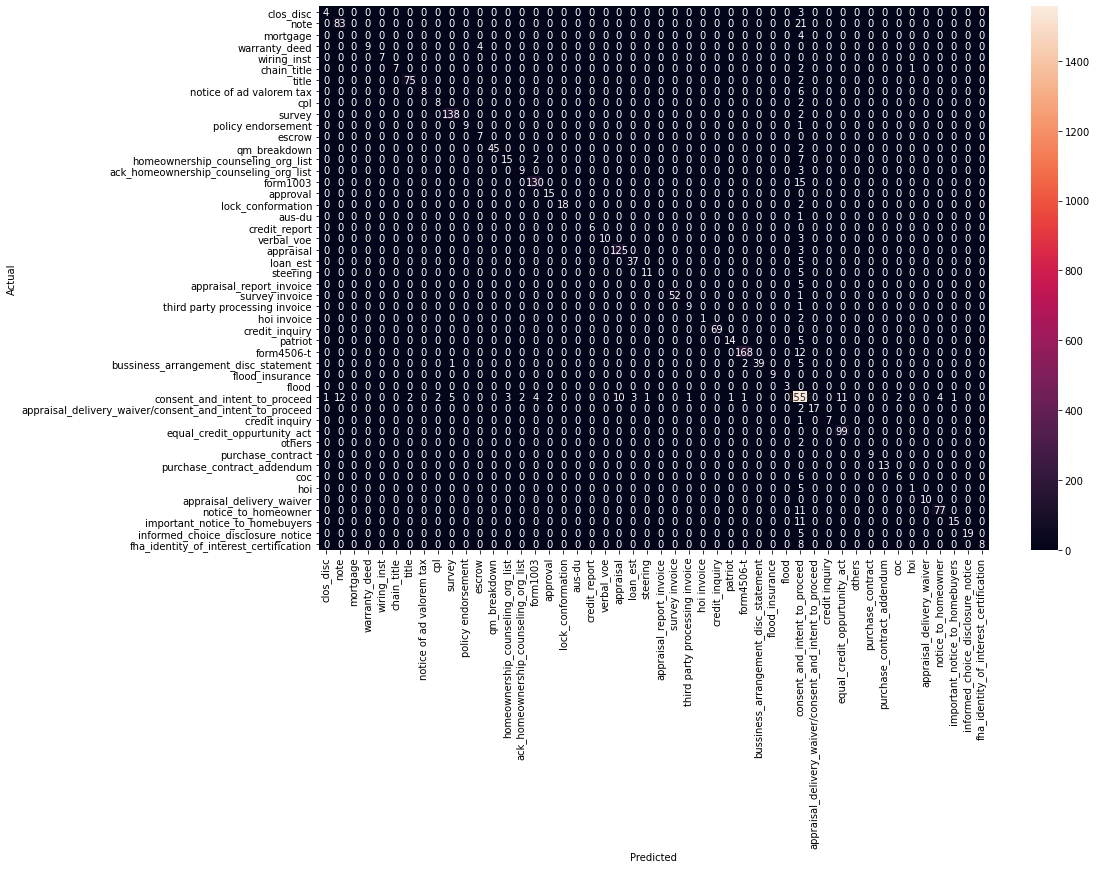

In [98]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=l, yticklabels=l)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [99]:
print ('Accuracy:', accuracy_score(y_test, y_pred))

print ('F1 score:', f1_score(y_test, y_pred,
                            average='weighted'))

print ('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))

print ('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))


Accuracy: 0.9228146311221327
F1 score: 0.9187457841101924
Recall: 0.9228146311221327
Precision: 0.9208553447627


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
svm_model = LinearSVC()

svm_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [101]:
y_pred=svm_model.predict(X_test)

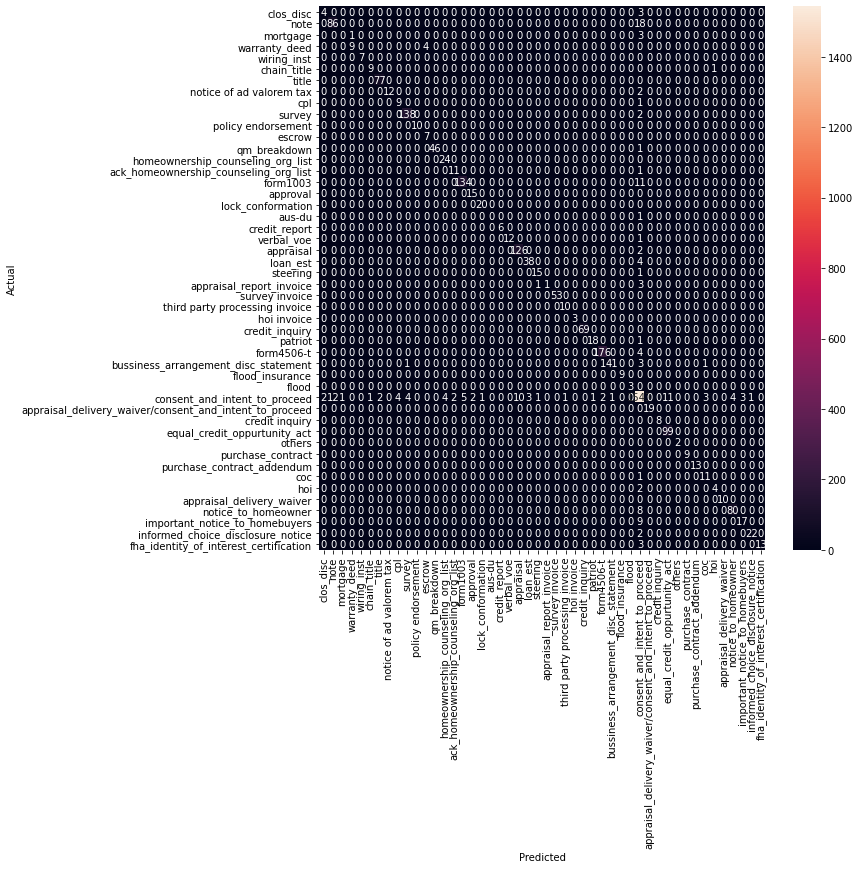

In [102]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=l, yticklabels=l)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [103]:
print ('Accuracy:', accuracy_score(y_test, y_pred))

print ('F1 score:', f1_score(y_test, y_pred,
                            average='weighted'))

print ('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))

print ('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))


Accuracy: 0.9448233106013639
F1 score: 0.9435894258874338
Recall: 0.9448233106013639
Precision: 0.944647113453014


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### From Above models Naive Bayes, Logistic Regression, and SVM. 
### SVM has an good accuracy. so we are considering this model
##NOTE: we can fine tune the model by modifications of labels and text for better features.

In [ ]:
# Reading Test Data

In [104]:
from google.colab import files
uploaded=files.upload()

Saving Test_data.csv to Test_data.csv


In [105]:
df1=pd.read_csv('Test_data.csv')

In [106]:
df1.shape

(5464, 1)

In [107]:
df1.head()

,Text
0,TRUE & CERTIFIED COPYDAThis form is a statemen...
1,Additional Information About This LoanLoan Dis...
2,Closing Cost DetailsBorrower-PaidSeller-PaidPa...
3,Calculating Cash to CloseUse this table to see...
4,Loan CalculationsOther DisclosuresTotal of Pay...


In [108]:
df1['Text'] = df1['Text'].str.replace("\r", " ")
df1['Text'] = df1['Text'].str.replace("\n", " ")
df1['Text'] = df1['Text'].str.replace("    ", " ")
df1['Text'] = df1['Text'].str.replace('"', '')
df1['Text'] = df1['Text'].str.replace("'s", "")

punctuation_signs = list("?:!.,;")
for punct_sign in punctuation_signs:
    df1['Text'] = df1['Text'].str.replace(punct_sign, '')

In [109]:
text=df1['Text']

In [110]:
len(text)

5464

In [111]:
df1['Text'][0]

'TRUE & CERTIFIED COPYDAThis form is a statement of final loan terms and closing costs Compare thisClosing Disclosuredocument with your Loan EstimateClosing InformationTransaction InformationLoan InformationDate Issued04/06/2018BorrowerJORGE ALBERTO VELISLoan Term30 yearsClosing Date04/06/201811362 TAFT ST UNIT 11362PurposePurchaseDisbursement Date04/06/2018PEMBROKE PINES FL 33026ProductFixed RateSellerSettlement AgentSOUTH FLORIDA TITLEMARSHALL K HUFFMAN and SARAH MASSOCIATES LLCVOGT HUFFMANLoan TypeConventionalFHA18431 NW 11TH CTFile #187-100569HOLLYWOOD FL 33029VAProperty18431 NW 11TH CTLenderUNITED WHOLESALE MORTGAGELoan ID #1218030700PEMBROKE PINES FL 33029MIC #6278615665Sale Price$44000000Loan TermsCan this amount increase after closingLoan Amount$418000NOInterest Rate5125%NOMonthly Principal & Interest$227596NOSee Projected Payments below for yourEstimated Total Monthly PaymentDoes the loan have these featuresPrepayment PenaltyNOBalloon PaymentNOProjected PaymentsPayment Calcula

In [112]:
corpus=[]

In [113]:
for i in range(len(text)):
    message = re.sub('[^a-zA-Z]', ' ', df1['Text'][i])
    message = message.lower()
    message = message.split()
    
    message = [stemming.stem(word) for word in message if not word in stopwords.words('english')]
    message=  [lemmatizer.lemmatize(word) for word in message if not word in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)
    print(i)

3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994


In [114]:
tfidf = TfidfVectorizer(max_features=2500,stop_words='english')

In [115]:
X = tfidf.fit_transform(corpus).toarray() 

y_final=svm_model.predict(X)

In [117]:
y_final.shape

(5464,)

In [120]:
y_final=pd.DataFrame(y_final)

In [128]:
y_final[0].value_counts()

34    5342
15      42
1       20
44      10
41       8
6        7
10       5
45       4
23       4
9        4
0        4
21       3
37       2
22       2
14       1
25       1
30       1
42       1
40       1
32       1
39       1
Name: 0, dtype: int64

In [129]:
df

,Label,Text,label_encoder
0,clos_disc,Closing DisclosureThis form is a statement of ...,9
1,clos_disc,Closing Cost DetailsBorrower-PaidSeller-PaldLo...,9
2,clos_disc,Calculating Cash to CloseUse this table to see...,9
3,clos_disc,Additiona Information About This LoanLoan Disc...,9
4,clos_disc,Loan CalculationsOther DisclosuresTotal of Pay...,9
...,...,...,...
16125,others,(0FILE #000135-000135PESXX9 091959758Earnings ...,34
16126,others,FraudGuardHamel Robert1028904BORROWER 1 (Rober...,34
16127,others,SHnVNDISOSNO BAEGTNyooahsis $aN33e S86VH SWONS...,34
16128,others,1Inbox (32) daniel@cariWells FargoxQG a Secure...,34


In [140]:
d=pd.Series(df.Label.values,index=df.label_encoder).to_dict()


In [141]:
d

{0: 'ack_homeownership_counseling_org_list',
 1: 'appraisal',
 2: 'appraisal_delivery_waiver',
 3: 'appraisal_delivery_waiver/consent_and_intent_to_proceed',
 4: 'appraisal_report_invoice',
 5: 'approval',
 6: 'aus-du',
 7: 'bussiness_arrangement_disc_statement',
 8: 'chain_title',
 9: 'clos_disc',
 10: 'coc',
 11: 'consent_and_intent_to_proceed',
 12: 'cpl',
 13: 'credit inquiry',
 14: 'credit_inquiry',
 15: 'credit_report',
 16: 'equal_credit_oppurtunity_act',
 17: 'escrow',
 18: 'fha_identity_of_interest_certification',
 19: 'flood',
 20: 'flood_insurance',
 21: 'form1003',
 22: 'form4506-t',
 23: 'hoi',
 24: 'hoi invoice',
 25: 'homeownership_counseling_org_list',
 26: 'important_notice_to_homebuyers',
 27: 'informed_choice_disclosure_notice',
 28: 'loan_est',
 29: 'lock_conformation',
 30: 'mortgage',
 31: 'note',
 32: 'notice of ad valorem tax',
 33: 'notice_to_homeowner',
 34: 'others',
 35: 'patriot',
 36: 'policy endorsement',
 37: 'purchase_contract',
 38: 'purchase_contract_

In [145]:
for i in range(len(y_final)):
  if y_final[0][i] in d.keys():
    y_final[0][i]=d.get(y_final[0][i])
    


In [146]:
y_final

,0
0,others
1,others
2,others
3,others
4,others
...,...
5459,others
5460,others
5461,others
5462,others


In [148]:
df2=pd.concat([df1,y_final],axis=1)

In [153]:
df2.head()

,Text,0
0,TRUE & CERTIFIED COPYDAThis form is a statemen...,others
1,Additional Information About This LoanLoan Dis...,others
2,Closing Cost DetailsBorrower-PaidSeller-PaidPa...,others
3,Calculating Cash to CloseUse this table to see...,others
4,Loan CalculationsOther DisclosuresTotal of Pay...,others


In [154]:
df2.columns=['Text','Predicted Label']

In [156]:
df2['Predicted Label'].replace('others','none')

0       none
1       none
2       none
3       none
4       none
        ... 
5459    none
5460    none
5461    none
5462    none
5463    none
Name: Predicted Label, Length: 5464, dtype: object

In [157]:
df2['Predicted Label'].value_counts()

others                                   5342
credit_report                              42
appraisal                                  20
title                                      10
survey                                      8
aus-du                                      7
coc                                         5
clos_disc                                   4
ack_homeownership_counseling_org_list       4
verbal_voe                                  4
hoi                                         4
form1003                                    3
form4506-t                                  2
purchase_contract                           2
survey invoice                              1
homeownership_counseling_org_list           1
mortgage                                    1
credit_inquiry                              1
notice of ad valorem tax                    1
steering                                    1
qm_breakdown                                1
Name: Predicted Label, dtype: int6

In [159]:
df2.to_csv('Results.csv',index=False)